<a href='https://honglab.ai'><p style="text-align:center;"><img src='https://lh3.googleusercontent.com/lY3ySXooSmwsq5r-mRi7uiypbo0Vez6pmNoQxMFhl9fmZJkRHu5lO2vo7se_0YOzgmDyJif9fi4_z0o3ZFdwd8NVSWG6Ea80uWaf3pOHpR4GHGDV7kaFeuHR3yAjIJjDgfXMxsvw=w2400'  class="center" width="100%" height="100%"/></p></a>

<center><em>Content Copyright by HongLab, Inc.</em></center>

# 가우시안 함수(Gaussian Functions)

### 가우시안 함수를 사용하는 이유

1. **중심극한정리 (Central Limit Theorem)**: Perhaps the most profound reason - when you add up many independent random variables, their sum tends to follow a Gaussian distribution, regardless of the original distributions! This makes Gaussians appear everywhere in nature.

2. **자연 현상 (Natural Phenomena)**: Many real-world phenomena follow Gaussian distributions:
   - Heights of people in a population
   - Measurement errors in experiments
   - Molecular velocities in gases (Maxwell-Boltzmann distribution)
   - Noise in electronic signals

3. **미분에 대한 닫힘 (Closure under differentiation)**: The derivative of a Gaussian is still a Gaussian (multiplied by a polynomial):
   $$\frac{d}{dx}\left(e^{-x^2}\right) = -2x \cdot e^{-x^2}$$
   This makes them ideal for analyzing systems with derivatives.

### 확률과 통계에서의 가우시안 (Gaussian in Probability and Statistics)

In probability theory, the Gaussian (or Normal) distribution is a **probability density function (PDF)** that describes the likelihood of a random variable taking certain values:

$$G(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Where:
- $\mu$ is the **mean** (expected value) - the center of the distribution
- $\sigma$ is the **standard deviation** - measures the spread or variability
- $\sigma^2$ is the **variance**

The constant $\frac{1}{\sigma\sqrt{2\pi}}$ ensures that the total probability integrates to 1 (normalization).

In [1]:
# Configure matplotlib for interactive widgets
%matplotlib widget

# If widget backend doesn't work, you can try:
# %matplotlib notebook

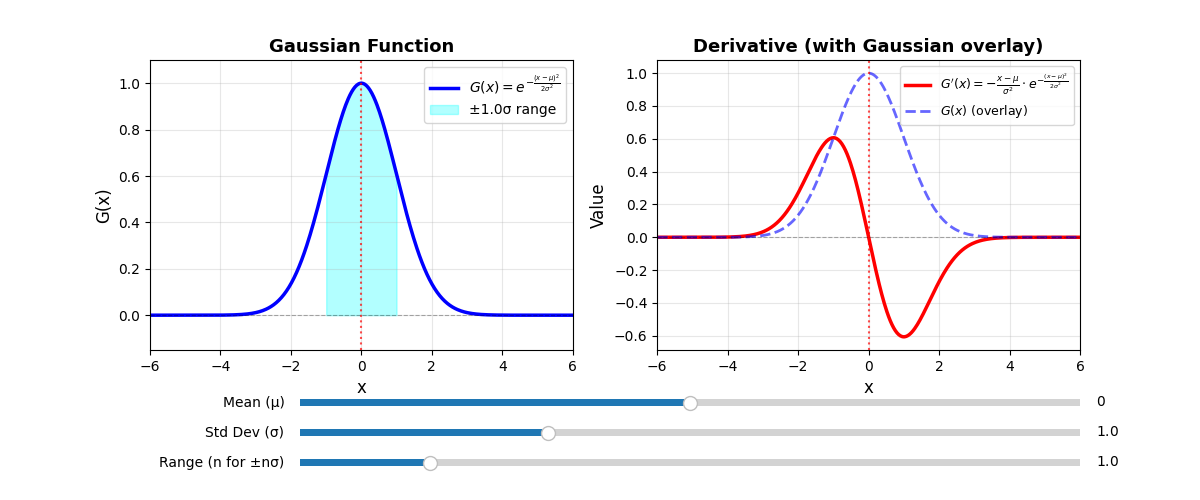

Interactive Exploration:
   • Move μ slider: Shift both the Gaussian and its derivative left/right
   • Move σ slider: Change the standard deviation (narrow = steep derivative, wide = gentle)
   • Move n slider: Adjust the ±nσ range shown by the cyan filled region
   • Notice: The derivative crosses zero exactly at μ (the Gaussian's peak)
   • The derivative is steepest where the Gaussian has maximum curvature
   • Empirical rule: n=1 (~68% area), n=2 (~95%), n=3 (~99.7%)


In [2]:
# Interactive Gaussian and its derivative with adjustable parameters
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def plot_interactive_gaussian_derivative():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    plt.subplots_adjust(bottom=0.3)
    
    x = np.linspace(-6, 6, 500)
    
    # Initial parameters
    mu_init = 0.0
    sigma_init = 1.0
    n_init = 1.0
    
    # Compute initial functions
    def gaussian(x, mu, sigma):
        return np.exp(-((x - mu)**2) / (2 * sigma**2))
    
    def derivative(x, mu, sigma):
        return -(x - mu) / (sigma**2) * np.exp(-((x - mu)**2) / (2 * sigma**2))
    
    gauss_init = gaussian(x, mu_init, sigma_init)
    deriv_init = derivative(x, mu_init, sigma_init)
    
    # Left plot: Gaussian function
    line_gauss, = ax1.plot(x, gauss_init, 'b-', linewidth=2.5, label='$G(x) = e^{-\\frac{(x-\\mu)^2}{2\\sigma^2}}$')
    
    # Fill initial ±nσ range
    mask_init = (x >= mu_init - n_init * sigma_init) & (x <= mu_init + n_init * sigma_init)
    fill_n_sigma = ax1.fill_between(x, 0, gauss_init, where=mask_init, alpha=0.3, color='cyan', label=f'±{n_init:.1f}σ range')
    
    ax1.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('G(x)', fontsize=12)
    ax1.set_title('Gaussian Function', fontsize=13, weight='bold')
    ax1.legend(fontsize=10, loc='upper right')
    ax1.set_ylim(-0.15, 1.1)
    ax1.set_xlim(-6, 6)
    vline_mu_left = ax1.axvline(mu_init, color='red', linewidth=1.5, linestyle=':', alpha=0.7)
    
    # Right plot: Derivative with Gaussian overlay
    line_deriv, = ax2.plot(x, deriv_init, 'r-', linewidth=2.5, label="$G'(x) = -\\frac{x-\\mu}{\\sigma^2} \\cdot e^{-\\frac{(x-\\mu)^2}{2\\sigma^2}}$")
    line_gauss_overlay, = ax2.plot(x, gauss_init, 'b--', linewidth=2, alpha=0.6, label='$G(x)$ (overlay)')
    ax2.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('x', fontsize=12)
    ax2.set_ylabel("Value", fontsize=12)
    ax2.set_title('Derivative (with Gaussian overlay)', fontsize=13, weight='bold')
    ax2.legend(fontsize=9, loc='upper right')
    ax2.set_xlim(-6, 6)
    vline_mu_right = ax2.axvline(mu_init, color='red', linewidth=1.5, linestyle=':', alpha=0.7)
    
    # Create sliders
    ax_mu = plt.axes([0.25, 0.18, 0.65, 0.03])
    ax_sigma = plt.axes([0.25, 0.12, 0.65, 0.03])
    ax_n = plt.axes([0.25, 0.06, 0.65, 0.03])
    
    slider_mu = Slider(ax_mu, 'Mean (μ)', -3, 3, valinit=mu_init)
    slider_sigma = Slider(ax_sigma, 'Std Dev (σ)', 0.3, 2.5, valinit=sigma_init)
    slider_n = Slider(ax_n, 'Range (n for ±nσ)', 0.5, 3.5, valinit=n_init, valstep=0.5)
    
    # Store fill object for updates
    fill_obj = [fill_n_sigma]
    
    def update(val):
        mu = slider_mu.val
        sigma = slider_sigma.val
        n = slider_n.val
        
        gauss_new = gaussian(x, mu, sigma)
        deriv_new = derivative(x, mu, sigma)
        
        # Update left plot
        line_gauss.set_ydata(gauss_new)
        vline_mu_left.set_xdata([mu, mu])
        
        # Remove old fill and create new one
        fill_obj[0].remove()
        mask = (x >= mu - n * sigma) & (x <= mu + n * sigma)
        fill_obj[0] = ax1.fill_between(x, 0, gauss_new, where=mask, alpha=0.3, color='cyan', label=f'±{n:.1f}σ range')
        
        # Update legend with current artists
        handles, labels = ax1.get_legend_handles_labels()
        ax1.legend(handles, labels, fontsize=10, loc='upper right')
        
        # Update right plot
        line_deriv.set_ydata(deriv_new)
        line_gauss_overlay.set_ydata(gauss_new)
        vline_mu_right.set_xdata([mu, mu])
        
        # Adjust y-limits dynamically
        ax2_ymin = min(deriv_new.min(), gauss_new.min()) - 0.1
        ax2_ymax = max(deriv_new.max(), gauss_new.max()) + 0.1
        ax2.set_ylim(ax2_ymin, ax2_ymax)
        
        fig.canvas.draw_idle()
    
    slider_mu.on_changed(update)
    slider_sigma.on_changed(update)
    slider_n.on_changed(update)
    
    fig.sliders = [slider_mu, slider_sigma, slider_n]
    plt.show()

plot_interactive_gaussian_derivative()

print("Interactive Exploration:")
print("   • Move μ slider: Shift both the Gaussian and its derivative left/right")
print("   • Move σ slider: Change the standard deviation (narrow = steep derivative, wide = gentle)")
print("   • Move n slider: Adjust the ±nσ range shown by the cyan filled region")
print("   • Notice: The derivative crosses zero exactly at μ (the Gaussian's peak)")
print("   • The derivative is steepest where the Gaussian has maximum curvature")
print("   • Empirical rule: n=1 (~68% area), n=2 (~95%), n=3 (~99.7%)")



## 2D 가우시안 함수

### 2D 가우시안 공식 (비등방성/타원형)

**원점 중심의 기본 형태**

1차원 가우시안 함수

$$G(x_0) = e^{-\frac{1}{2}{x_0^2}}$$

2차원 가우시안 함수

$$G(x_0, y_0) = e^{-\frac{1}{2}(x_0^2 + y_0^2)}$$

$$G(\mathbf{x}_0) = e^{-\frac{1}{2}\mathbf{x}_0^T\mathbf{x}_0}$$

where $\mathbf{x}_0 = \begin{bmatrix} x_0 \\ y_0 \end{bmatrix}$ represents the original point coordinates, and $\mathbf{x}_0^T\mathbf{x}_0 = \begin{bmatrix} x_0 & y_0 \end{bmatrix} \begin{bmatrix} x_0 \\ y_0 \end{bmatrix} = x_0^2 + y_0^2$.

**변환 관계 (Transformation)**

Forward transformation (from normalized to world space):
$$\mathbf{x} = RS\mathbf{x}_0 + \boldsymbol{\mu}$$

where:
- **Rotation matrix** $R$: Rotates the Gaussian by angle $\theta$
$$R = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$$

- **Scaling matrix** $S$: Stretches the Gaussian along x and y axes
$$S = \begin{bmatrix} \sigma_x & 0 \\ 0 & \sigma_y \end{bmatrix}$$

Inverse transformation (from world to normalized space):
$$\mathbf{x}_0 = (RS)^{-1}(\mathbf{x} - \boldsymbol{\mu})$$

Apply the inverse transformation to the basic Gaussian formula $G(\mathbf{x}_0) = e^{-\frac{1}{2}\mathbf{x}_0^T\mathbf{x}_0}$:

$$G(\mathbf{x}) = G\left((RS)^{-1}(\mathbf{x} - \boldsymbol{\mu})\right) = e^{-\frac{1}{2}\left[(RS)^{-1}(\mathbf{x} - \boldsymbol{\mu})\right]^T \left[(RS)^{-1}(\mathbf{x} - \boldsymbol{\mu})\right]}$$

Simplify using $(RS)^{-1} = S^{-1}R^{-1} = S^{-1}R^T$ (since $R^{-1} = R^T$ for rotation matrices):

$$G(\mathbf{x}) = e^{-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T (RS)(RS)^T(\mathbf{x} - \boldsymbol{\mu})} = e^{-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})}$$

where the covariance matrix is $\Sigma = RSS^TR^T$.



d:\anaconda3\envs\testenv2\lib\site-packages\ipympl\backend_nbagg.py:342: UserWarning: Glyph 7527 (\N{GREEK SUBSCRIPT SMALL LETTER GAMMA}) missing from font(s) DejaVu Sans Mono.
  self.figure.savefig(buf, format='png', dpi='figure')


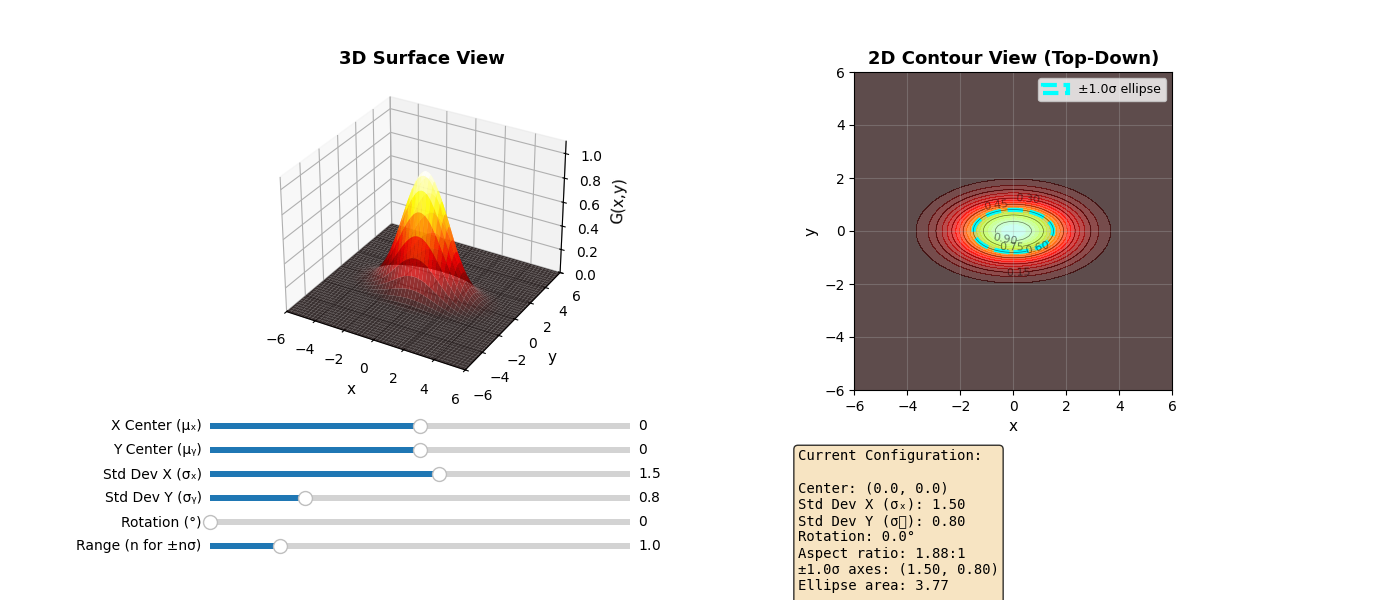

   • Move μₓ, μᵧ sliders: Translate by mean vector μ (shifts the center)
   • Move σₓ, σᵧ sliders: Adjust scaling matrix S (spread in each direction)
   • Move Rotation slider: Apply rotation matrix R(θ) to the Gaussian
   • Move σₓ, σᵧ sliders: Change spread in x and y directions independently
   • Notice: Covariance Σ = R S S^T R^T creates off-diagonal terms when rotated
   • Try σₓ = σᵧ for circular Gaussian (rotation has no visible effect)
   • Formula: G(x; μ, S, R) = exp(-0.5 * (x-μ)^T Σ^(-1) (x-μ))
   • Transformation pipeline: translation → scaling → rotation
   • The 3D view shows the rotated hill, 2D view shows elliptical contours


In [ ]:
def gaussian_2d_anisotropic(x, y, mu_x, mu_y, sigma_x, sigma_y, rotation_deg=0):
    """
    2D Anisotropic (rotatable elliptical) Gaussian function using matrix form.
    Implements: G(x; μ, S, R) = exp(-0.5 * (x - μ)^T (R S S^T R^T)^(-1) (x - μ))
    
    Args:
        x, y: Coordinate grids (original points x₀)
        mu_x, mu_y: Mean vector μ = [μₓ, μᵧ] (center position)
        sigma_x, sigma_y: Scaling parameters (standard deviations before rotation)
        rotation_deg: Rotation angle θ in degrees
    
    Returns:
        Gaussian values evaluated at each grid point
    """
    # Flatten coordinate grids
    x_flat = x.ravel()
    y_flat = y.ravel()
    
    # Step 1: Translate by mean vector μ to get (x - μ)
    translated = np.stack([x_flat - mu_x, y_flat - mu_y], axis=1)  # (N, 2)
    
    # Step 2: Create scaling matrix S
    # S = np.array([TODO, TODO])
    
    # Step 3: Create rotation matrix R(θ)
    theta = np.deg2rad(rotation_deg)
    # R = np.array(TODO)
    
    # Step 4: Compute covariance matrix Σ = R S S^T R^T
    # Sigma = TODO
    
    # Step 5: Compute inverse covariance (precision matrix) Σ^(-1)
    # Sigma_inv = TODO
    
    # Step 6: Evaluate quadratic form: (x - μ)^T Σ^(-1) (x - μ)
    # This geometrically transforms points into normalized space where Gaussian is a unit circle
    # power = -0.5 * np.einsum('ij,jk,ik->i', TODO, TODO, TODO)
    
    # Step 7: Compute Gaussian value and reshape back to original grid
    return np.exp(power).reshape(x.shape)

def plot_interactive_2d_gaussian():
    # Create mesh grid
    x = np.linspace(-6, 6, 100)
    y = np.linspace(-6, 6, 100)
    X, Y = np.meshgrid(x, y)
    
    # Initial parameters
    mu_x_init = 0.0
    mu_y_init = 0.0
    sigma_x_init = 1.5
    sigma_y_init = 0.8
    n_init = 1.0
    rotation_init = 0
    
    fig = plt.figure(figsize=(14, 6))
    plt.subplots_adjust(bottom=0.35)
    
    # 3D surface view
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.set_xlabel('x', fontsize=11)
    ax1.set_ylabel('y', fontsize=11)
    ax1.set_zlabel('G(x,y)', fontsize=11)
    ax1.set_title('3D Surface View', fontsize=13, weight='bold')
    
    # 2D contour view
    ax2 = fig.add_subplot(122)
    ax2.set_xlabel('x', fontsize=11)
    ax2.set_ylabel('y', fontsize=11)
    ax2.set_title('2D Contour View (Top-Down)', fontsize=13, weight='bold')
    ax2.set_xlim(-6, 6)
    ax2.set_ylim(-6, 6)
    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    
    # Create sliders
    ax_mu_x = plt.axes([0.15, 0.28, 0.3, 0.02])
    ax_mu_y = plt.axes([0.15, 0.24, 0.3, 0.02])
    ax_sigma_x = plt.axes([0.15, 0.20, 0.3, 0.02])
    ax_sigma_y = plt.axes([0.15, 0.16, 0.3, 0.02])
    ax_rotation = plt.axes([0.15, 0.12, 0.3, 0.02])
    ax_n = plt.axes([0.15, 0.08, 0.3, 0.02])
    
    slider_mu_x = Slider(ax_mu_x, 'X Center (μₓ)', -3, 3, valinit=mu_x_init)
    slider_mu_y = Slider(ax_mu_y, 'Y Center (μᵧ)', -3, 3, valinit=mu_y_init)
    slider_sigma_x = Slider(ax_sigma_x, 'Std Dev X (σₓ)', 0.3, 2.5, valinit=sigma_x_init)
    slider_sigma_y = Slider(ax_sigma_y, 'Std Dev Y (σᵧ)', 0.3, 2.5, valinit=sigma_y_init)
    slider_rotation = Slider(ax_rotation, 'Rotation (°)', 0, 180, valinit=rotation_init)
    slider_n = Slider(ax_n, 'Range (n for ±nσ)', 0.5, 3.5, valinit=n_init, valstep=0.5)
    
    # Add text box for statistics
    text_ax = plt.axes([0.55, 0.08, 0.4, 0.18])
    text_ax.axis('off')
    
    def update(val):
        mu_x = slider_mu_x.val
        mu_y = slider_mu_y.val
        sigma_x = slider_sigma_x.val
        sigma_y = slider_sigma_y.val
        rotation = slider_rotation.val
        n = slider_n.val
        
        Z = gaussian_2d_anisotropic(X, Y, mu_x, mu_y, sigma_x, sigma_y, rotation)
        
        # Update 3D surface
        ax1.clear()
        surf = ax1.plot_surface(X, Y, Z, cmap='hot', alpha=0.8, edgecolor='none')
        ax1.set_xlabel('x', fontsize=11)
        ax1.set_ylabel('y', fontsize=11)
        ax1.set_zlabel('G(x,y)', fontsize=11)
        ax1.set_title('3D Surface View', fontsize=13, weight='bold')
        ax1.set_xlim(-6, 6)
        ax1.set_ylim(-6, 6)
        ax1.set_zlim(0, 1.1)
        
        # Update 2D contour
        ax2.clear()
        
        # Compute Mahalanobis distance using full covariance Σ = R S S^T R^T
        theta = np.deg2rad(rotation)
        R = np.array([[np.cos(theta), -np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
        S = np.array([[sigma_x, 0], [0, sigma_y]])
        Sigma = R @ S @ S.T @ R.T
        Sigma_inv = np.linalg.inv(Sigma)
        
        # Compute (x - μ) for all points
        dx = X - mu_x
        dy = Y - mu_y
        translated = np.stack([dx.ravel(), dy.ravel()], axis=1)
        
        # Compute (x - μ)^T Σ^(-1) (x - μ) for each point
        mahalanobis_dist_sq = np.einsum('ij,jk,ik->i', translated, Sigma_inv, translated).reshape(X.shape)
        mask = mahalanobis_dist_sq <= n**2
        
        # Plot filled contour
        contourf = ax2.contourf(X, Y, Z, levels=20, cmap='hot', alpha=0.7)
        contours = ax2.contour(X, Y, Z, levels=8, colors='black', linewidths=0.5, alpha=0.5)
        ax2.clabel(contours, inline=True, fontsize=8)
        
        # Highlight ±nσ region
        ax2.contourf(X, Y, mask.astype(float), levels=[0.5, 1.5], colors='cyan', alpha=0.2)
        
        # Draw ±nσ ellipse boundary (rotated)
        from matplotlib.patches import Ellipse
        ellipse = Ellipse((mu_x, mu_y), 2*n*sigma_x, 2*n*sigma_y, 
                         angle=rotation, fill=False, edgecolor='cyan', 
                         linewidth=3, linestyle='--', label=f'±{n:.1f}σ ellipse')
        ax2.add_patch(ellipse)
        
        ax2.set_xlabel('x', fontsize=11)
        ax2.set_ylabel('y', fontsize=11)
        ax2.set_title('2D Contour View (Top-Down)', fontsize=13, weight='bold')
        ax2.set_xlim(-6, 6)
        ax2.set_ylim(-6, 6)
        ax2.set_aspect('equal')
        ax2.grid(True, alpha=0.3)
        ax2.legend(fontsize=9, loc='upper right')
        
        # Update statistics text
        text_ax.clear()
        text_ax.axis('off')
        ellipse_area = np.pi * (n * sigma_x) * (n * sigma_y)
        aspect_ratio = sigma_x / sigma_y
        info_text = f"""Current Configuration:
        
Center: ({mu_x:.1f}, {mu_y:.1f})
Std Dev X (σₓ): {sigma_x:.2f}
Std Dev Y (σᵧ): {sigma_y:.2f}
Rotation: {rotation:.1f}°
Aspect ratio: {aspect_ratio:.2f}:1
±{n:.1f}σ axes: ({n*sigma_x:.2f}, {n*sigma_y:.2f})
Ellipse area: {ellipse_area:.2f}
"""
        text_ax.text(0.05, 0.95, info_text, fontsize=10, verticalalignment='top',
                    family='monospace',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        fig.canvas.draw_idle()
    
    slider_mu_x.on_changed(update)
    slider_mu_y.on_changed(update)
    slider_sigma_x.on_changed(update)
    slider_sigma_y.on_changed(update)
    slider_rotation.on_changed(update)
    slider_n.on_changed(update)
    
    fig.sliders = [slider_mu_x, slider_mu_y, slider_sigma_x, slider_sigma_y, slider_rotation, slider_n]
    update(None)
    plt.show()
    slider_n.on_changed(update)
plot_interactive_2d_gaussian()
print("   • Move μₓ, μᵧ sliders: Translate by mean vector μ (shifts the center)")
print("   • Move σₓ, σᵧ sliders: Adjust scaling matrix S (spread in each direction)")
print("   • Move Rotation slider: Apply rotation matrix R(θ) to the Gaussian")
print("   • Move σₓ, σᵧ sliders: Change spread in x and y directions independently")
print("   • Notice: Covariance Σ = R S S^T R^T creates off-diagonal terms when rotated")
print("   • Try σₓ = σᵧ for circular Gaussian (rotation has no visible effect)")
print("   • Formula: G(x; μ, S, R) = exp(-0.5 * (x-μ)^T Σ^(-1) (x-μ))")
print("   • Transformation pipeline: translation → scaling → rotation")
print("   • The 3D view shows the rotated hill, 2D view shows elliptical contours")

## 2D 가우시안 스플랫 래스터화

### 래스터화 알고리즘

The process follows these steps:

1. **Create a pixel grid**: Define an image as a 2D array of pixels (width × height)
   - Each pixel has integer coordinates: (0,0), (0,1), ..., (width-1, height-1)

2. **For each pixel** in the image:
   - Compute the translated vector: $(\mathbf{x} - \boldsymbol{\mu})$ where $\mathbf{x}$ is the pixel position
   - Build the covariance matrix: $\Sigma = R S S^T R^T$
   - Evaluate the Gaussian: $G = e^{-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})}$
   - Multiply the Gaussian value by the color to get the pixel's RGB values

3. **Store the result** as the pixel's color/intensity in the output image

### 주요 구현 세부사항

**einsum을 사용한 효율적인 배치 계산:**
Instead of looping through each pixel individually, we:
- Flatten all pixel coordinates into a single array
- Compute all Gaussian values at once using `np.einsum`
- Reshape back to the image dimensions

**이차 형식 (Quadratic form):**
$$\text{power} = -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})$$

This is the same formula as before, but now applied to **discrete pixel locations** rather than a continuous grid. The covariance matrix $\Sigma = R S S^T R^T$ includes:
- **Scaling** via $S$ (controls spread)
- **Rotation** via $R$ (controls orientation)
- **Off-diagonal terms** that couple x and y (created by rotation)

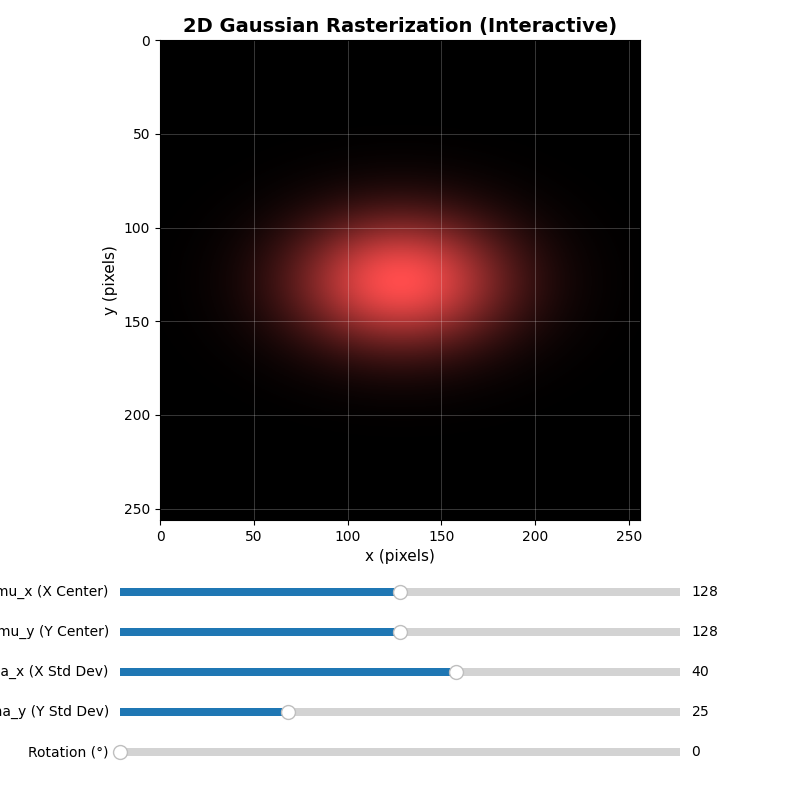


Interactive Gaussian Rasterization:
   • Move mu_x, mu_y sliders: Translate by mean vector μ (shift position)
   • Move sigma_x, sigma_y sliders: Adjust scaling matrix S (change spread)
   • Move Rotation slider: Apply rotation matrix R(θ)
   • Notice: Σ = R S S^T R^T creates off-diagonal terms when rotated
   • The smooth pixel values create anti-aliased edges
   • Formula: power = -0.5 * (x-μ)^T Σ^(-1) (x-μ)
   • Transformation: (x-μ) → (RS)^(-1)(x-μ) → unit circle
   • This is the core of 3D Gaussian Splatting rendering!


In [ ]:
def rasterize_gaussian_2d_rotated(width, height, mu_x, mu_y, sigma_x, sigma_y, rotation_deg, color):
    """
    Rasterize a 2D Gaussian onto a pixel grid using matrix form.
    Implements: G(x; μ, S, R) = exp(-0.5 * (x - μ)^T (R S S^T R^T)^(-1) (x - μ))
    
    Args:
        width, height: Image dimensions in pixels
        mu_x, mu_y: Mean vector μ = [μₓ, μᵧ] in pixel coordinates
        sigma_x, sigma_y: Scaling parameters (standard deviations before rotation)
        rotation_deg: Rotation angle θ in degrees
        color: (r, g, b) color values [0, 1]
    
    Returns:
        image: (height, width, 3) RGB image array
    """
    # Create pixel coordinate grid (original points x₀)
    x_coords = np.arange(width)
    y_coords = np.arange(height)
    X, Y = np.meshgrid(x_coords, y_coords)
    
    # Step 1: Translate by mean vector μ to get (x - μ)
    # This shifts the Gaussian center from origin to (μₓ, μᵧ)
    dx = X - mu_x
    dy = Y - mu_y

    # TODO: 위 예제와 같아요.
    
    # Reshape power back to image dimensions
    power = power.reshape(height, width)
    
    # Compute Gaussian value
    gaussian_value = np.exp(power)
    
    # Create RGB image by broadcasting color with Gaussian values
    image = np.stack([color[ch] * gaussian_value for ch in range(3)], axis=2)
    
    # Clip to valid range
    image = np.clip(image, 0, 1)
    
    return image

def plot_interactive_gaussian_rasterization():
    """
    Interactive visualization of 2D Gaussian rasterization with rotation.
    """
    # Initial parameters
    width, height = 256, 256
    mu_x_init = 128
    mu_y_init = 128
    sigma_x_init = 40
    sigma_y_init = 25
    rotation_init = 0
    color = (1.0, 0.3, 0.3)  # Red
    
    # Create figure
    fig = plt.figure(figsize=(8, 8))
    plt.subplots_adjust(bottom=0.35)
    
    # Create axis for image
    ax = plt.axes([0.1, 0.35, 0.8, 0.6])
    
    # Initial image
    img_init = rasterize_gaussian_2d_rotated(width, height, mu_x_init, mu_y_init, 
                                             sigma_x_init, sigma_y_init, rotation_init, color)
    im = ax.imshow(img_init, extent=[0, width, height, 0])
    ax.set_title('2D Gaussian Rasterization (Interactive)', fontsize=14, weight='bold')
    ax.set_xlabel('x (pixels)', fontsize=11)
    ax.set_ylabel('y (pixels)', fontsize=11)
    ax.grid(True, alpha=0.3, color='white', linewidth=0.5)
    
    # Create sliders
    ax_mu_x = plt.axes([0.15, 0.25, 0.7, 0.02])
    ax_mu_y = plt.axes([0.15, 0.20, 0.7, 0.02])
    ax_sigma_x = plt.axes([0.15, 0.15, 0.7, 0.02])
    ax_sigma_y = plt.axes([0.15, 0.10, 0.7, 0.02])
    ax_rotation = plt.axes([0.15, 0.05, 0.7, 0.02])
    
    slider_mu_x = Slider(ax_mu_x, 'mu_x (X Center)', 50, 206, valinit=mu_x_init)
    slider_mu_y = Slider(ax_mu_y, 'mu_y (Y Center)', 50, 206, valinit=mu_y_init)
    slider_sigma_x = Slider(ax_sigma_x, 'sigma_x (X Std Dev)', 10, 60, valinit=sigma_x_init)
    slider_sigma_y = Slider(ax_sigma_y, 'sigma_y (Y Std Dev)', 10, 60, valinit=sigma_y_init)
    slider_rotation = Slider(ax_rotation, 'Rotation (°)', 0, 180, valinit=rotation_init)
    
    def update(val):
        mu_x = slider_mu_x.val
        mu_y = slider_mu_y.val
        sigma_x = slider_sigma_x.val
        sigma_y = slider_sigma_y.val
        rotation = slider_rotation.val
        
        # Rasterize new Gaussian
        img_new = rasterize_gaussian_2d_rotated(width, height, mu_x, mu_y, 
                                               sigma_x, sigma_y, rotation, color)
        
        # Update image
        im.set_data(img_new)
        fig.canvas.draw_idle()
    
    slider_mu_x.on_changed(update)
    slider_mu_y.on_changed(update)
    slider_sigma_x.on_changed(update)
    slider_sigma_y.on_changed(update)
    slider_rotation.on_changed(update)
    
    fig.sliders = [slider_mu_x, slider_mu_y, slider_sigma_x, slider_sigma_y, slider_rotation]
    plt.show()

plot_interactive_gaussian_rasterization()

print("\nInteractive Gaussian Rasterization:")
print("   • Move mu_x, mu_y sliders: Translate by mean vector μ (shift position)")
print("   • Move sigma_x, sigma_y sliders: Adjust scaling matrix S (change spread)")
print("   • Move Rotation slider: Apply rotation matrix R(θ)")
print("   • Notice: Σ = R S S^T R^T creates off-diagonal terms when rotated")
print("   • The smooth pixel values create anti-aliased edges")
print("   • Formula: power = -0.5 * (x-μ)^T Σ^(-1) (x-μ)")
print("   • Transformation: (x-μ) → (RS)^(-1)(x-μ) → unit circle")
print("   • This is the core of 3D Gaussian Splatting rendering!")